In [1]:
import re
import pandas as pd
import numpy as np

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/reaksa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
df = pd.read_csv('../data/uci_news_aggregator.csv')
pd.set_option('display.max_columns', None)

In [8]:
ds = df[['TITLE','CATEGORY']]

In [7]:
cleaned = []
for i in range(0,len(ds)):
    
    #removing any other words than (a-z) and (A-Z)
    msg = re.sub('[^a-zA-Z]',' ',  ds['TITLE'][i])
    
    #converting all texts to lower case
    msg = msg.lower()
    
    #tokenizing
    msg = msg.split(' ')
    
    #stemming and removing stopwords
    ps = PorterStemmer()
    msg = [ps.stem(words) for words in msg if not words in set(stopwords.words('english'))]
    msg = ' '.join(msg)
    cleaned.append(msg)

In [11]:
x = np.array(ds['TITLE'])

In [12]:
y = np.array(ds['CATEGORY'])

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [14]:
X_train, X_test , y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=45)

In [15]:
tfidf_vectorizer = TfidfVectorizer() 
text_train = tfidf_vectorizer.fit_transform(X_train)


In [52]:
text_test = tfidf_vectorizer.transform(X_test)

In [58]:
count_vector = CountVectorizer(stop_words = 'english')
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

In [35]:
text_train.shape

(316814, 49616)

In [ ]:
x_test = np.array(text_test)
print(x_test)

In [36]:
y_test.shape

(105605,)

In [ ]:
model = GaussianNB()
model.fit(text_train, y_train)

In [59]:
n_model = MultinomialNB(alpha=0.1)
n_model.fit(training_data, y_train)

MultinomialNB(alpha=0.1)

In [62]:
sc = n_model.score(training_data, y_train)
print(sc)

0.9430296640931272


In [63]:
pre = n_model.predict(testing_data)

In [64]:
from sklearn.metrics import classification_report
target = ['Business','Science','Entertainment','Health']
report = classification_report(pre, y_test, target_names=target)
print(report)

               precision    recall  f1-score   support

     Business       0.91      0.91      0.91     28876
      Science       0.96      0.97      0.97     37874
Entertainment       0.93      0.93      0.93     11380
       Health       0.91      0.91      0.91     27475

     accuracy                           0.93    105605
    macro avg       0.93      0.93      0.93    105605
 weighted avg       0.93      0.93      0.93    105605



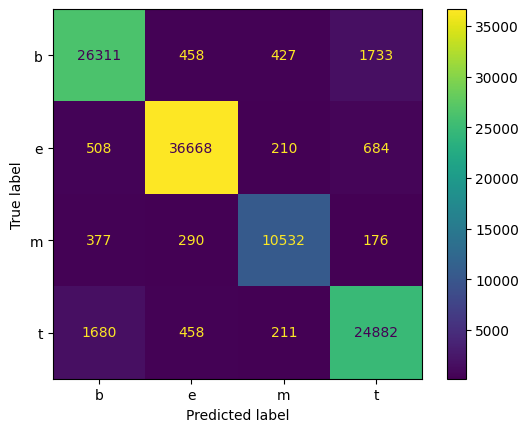

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
rm = confusion_matrix(y_test, pre, labels=n_model.classes_)
dis = ConfusionMatrixDisplay(confusion_matrix=rm, display_labels=n_model.classes_)
dis.plot()